In [25]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy import stats

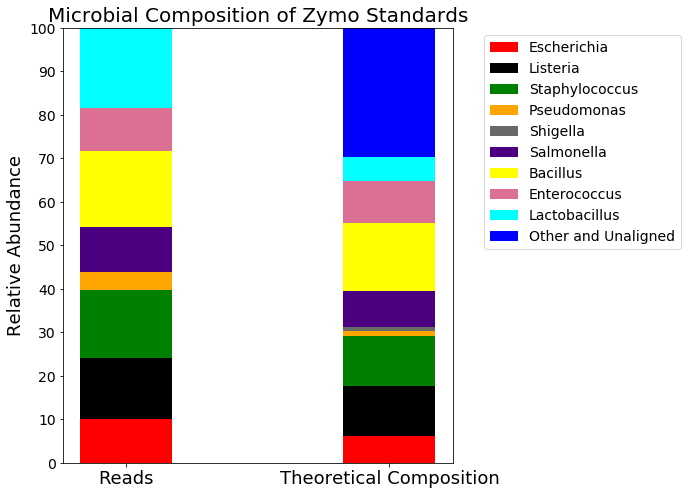

In [91]:
# Zymo Standards stacked bar chart

# Files to read in
file = "./170718_16s_zymoStandards.filtqual.minimap2.genusList.rem_low.txt"

genera_z = {}

# Dictionary with genera and percentages of reads
f = open(file,"r")
reads = f.readlines()
f.close()
for line in reads:
    gen = line.split()[0]
    if gen not in genera_z:
        genera_z[gen] = float(line.split()[2])

# Dictionary of real composition
real_comp = {'Bacillus': 17.4, 'Staphylococcus': 15.5, 'Listeria': 14.1, 'Salmonella': 10.4, 'Enterococcus': 9.9,
            'Escherichia': 10.1, 'Lactobacillus': 18.4, 'Pseudomonas': 4.2}

# Plotting
plt.rcParams.update({"figure.figsize":(7, 8)})
plt.rcParams.update({"xtick.labelsize":14,"ytick.labelsize":14})

N = 2
ind = np.arange(N)
width = 0.35
prev = np.zeros(N)
legend = []
names = []
colors = ["r","k","g","orange","dimgrey","indigo","yellow","palevioletred","cyan"]

i = 0
for k in genera_z:
    if k in real_comp:
        legend.append(plt.bar(ind, (real_comp[k], genera_z[k]), width, bottom=prev, color=colors[i]))
        prev += (real_comp[k], genera_z[k])
    else:
        legend.append(plt.bar(ind, (0, genera_z[k]), width, bottom=prev, color=colors[i]))
        prev += (0, genera_z[k])
    names.append(str(k))
    i += 1
tup = 100
tup = (tup,) * N
legend.append(plt.bar(ind, tuple(np.subtract(tup, prev)), width, bottom=prev, color="b"))
names.append('Other and Unaligned')
plt.xticks(ind, ('Reads', 'Theoretical Composition'), fontsize=18)
plt.yticks(np.arange(0, 110, 10))
plt.ylabel('Relative Abundance', fontsize=18)
plt.title('Microbial Composition of Zymo Standards', fontsize=20)
plt.legend(legend, names, loc=1, bbox_to_anchor=(1.6,1), fontsize=14)
plt.show()

In [30]:
# Read in all the files, create a dictionary with the genera as the keys and percents for each file as keys

# Files to read in
files = ["./sample.21.filtqual.202.minimap2.genusList.rem_low.txt",
         "./sample.22.filtqual.202.minimap2.genusList.rem_low.txt",
         "./sample.23.filtqual.202.minimap2.genusList.rem_low.txt",
         "./sample.24.filtqual.202.minimap2.genusList.rem_low.txt",
         "./sample.25.filtqual.202.minimap2.genusList.rem_low.txt",
         "./sample.31.filtqual.202.minimap2.genusList.rem_low.txt",
         "./sample.32.filtqual.202.minimap2.genusList.rem_low.txt",
         "./sample.33.filtqual.202.minimap2.genusList.rem_low.txt",
         "./sample.34.filtqual.202.minimap2.genusList.rem_low.txt",
         "./sample.35.filtqual.202.minimap2.genusList.rem_low.txt",
         "./sample.36.filtqual.202.minimap2.genusList.rem_low.txt", 
         "./sample.37.filtqual.202.minimap2.genusList.rem_low.txt", 
         "./sample.38.filtqual.202.minimap2.genusList.rem_low.txt", 
         "./sample.44.filtqual.202.minimap2.genusList.rem_low.txt", 
         "./sample.45.filtqual.202.minimap2.genusList.rem_low.txt", 
         "./sample.46.filtqual.202.minimap2.genusList.rem_low.txt"]

# Initializing dictionary
genera = {}

# Adding genera to dict
for name in files:
    f = open(name,"r")
    reads = f.readlines()
    f.close()
    for line in reads:
        gen = line.split()[0]
        if gen not in genera:
            genera[gen] = ()

# Adding percent values to the dictionary
for name in files:
    # Read files
    f = open(name,"r")
    reads = f.readlines()
    f.close()
    # Make a dictionary from the reads
    samples = {}
    for gen in reads:
        gen = gen.split()
        samples[gen[0]] = gen[2]
    # Adding to main dictionary
    for k in genera:
        if k in samples:
            tup = (float(samples[k].strip()),)
            genera[k] = genera[k] + tup
        else:
            genera[k] = genera[k] + (0,)

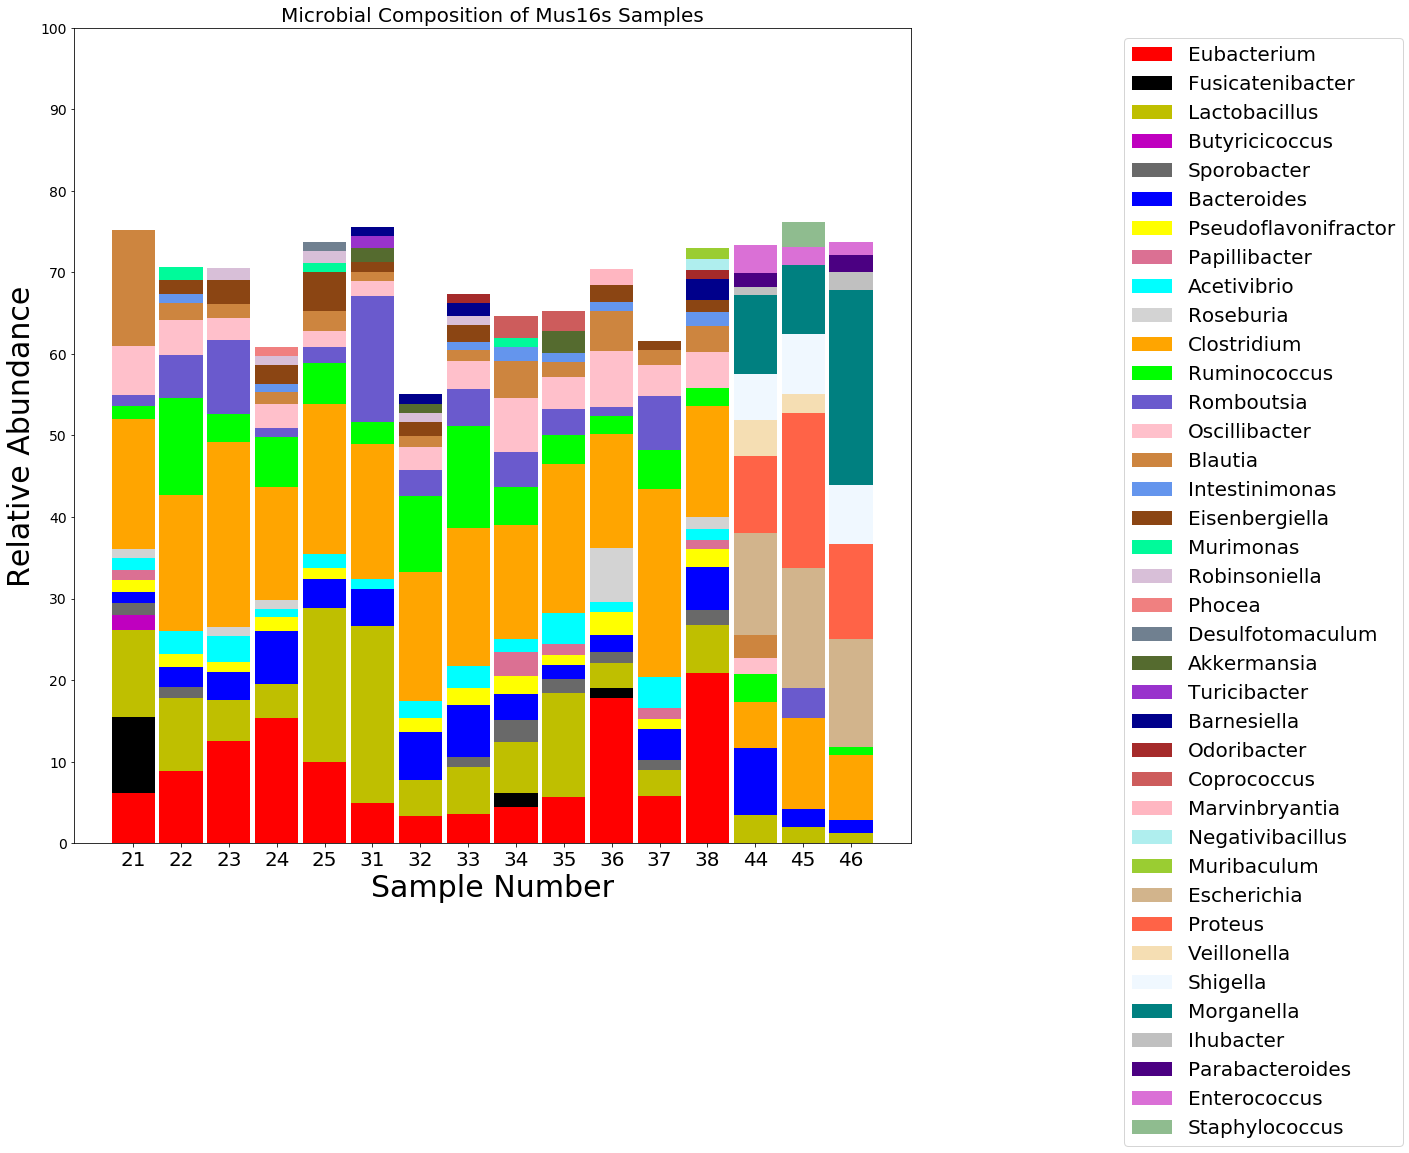

In [42]:
# Create stacked bar chart representing these distributions, inlcuding all genera with a cutoff of 1%

plt.rcParams.update({"figure.figsize":(15, 15)})
plt.rcParams.update({"xtick.labelsize":14,"ytick.labelsize":14})

N = len(files)
ind = np.arange(N)
width = 0.9
prev = np.zeros(N)
legend = []
names = []
colors = ["r","k","y","m","dimgrey","b","yellow","palevioletred","cyan","lightgray","orange","lime","slateblue",
         "pink","peru","cornflowerblue","saddlebrown","mediumspringgreen","thistle","lightcoral","slategrey",
         "darkolivegreen","darkorchid","darkblue","brown","indianred","lightpink","paleturquoise","yellowgreen","tan",
         "tomato", "wheat", "aliceblue", "teal", "silver", "indigo", "orchid", "darkseagreen"]
i = 0
for k in genera:
    legend.append(plt.bar(ind, genera[k], width, bottom=prev, color=colors[i]))
    prev += genera[k]
    names.append(str(k))
    i += 1
plt.xticks(ind, ('21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '36', '37', '38', '44', '45', '46'), fontsize=20)
plt.yticks(np.arange(0, 110, 10))
plt.xlabel('Sample Number', fontsize=30)
plt.ylabel('Relative Abundance', fontsize=30)
plt.title('Microbial Composition of Mus16s Samples', fontsize=20)
plt.legend(legend, names, loc=1, bbox_to_anchor=(1.6,1), fontsize=20)
plt.show()

[20.92319561 15.52684046 21.64177607 23.10235925 14.16333409]
['Eubacterium', 'Romboutsia', 'Lactobacillus', 'Clostridium', 'Blautia']
[14.67571003  8.30381303 11.15197121 18.99653306 23.90051151]
['Escherichia', 'Bacteroides', 'Clostridium', 'Proteus', 'Morganella']


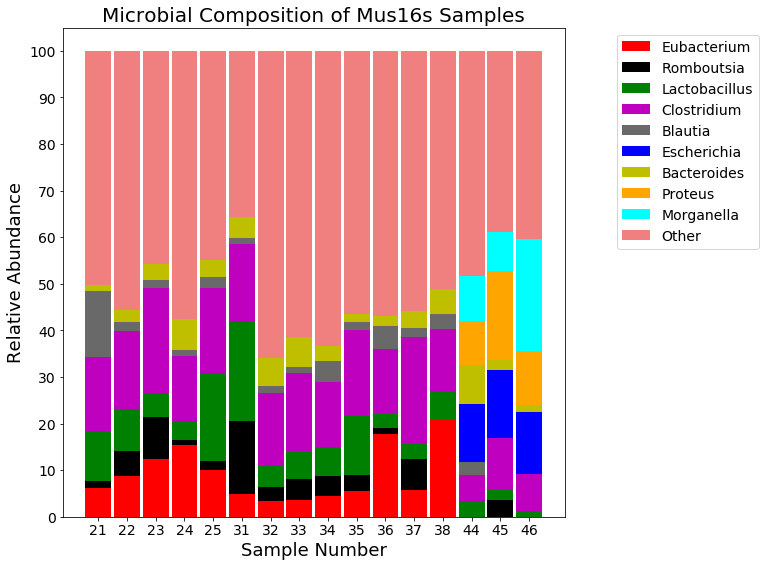

In [53]:
# Create stacked bar chart representing these distributions, inlcuding only the top 5 genera for each group

tops_perc_control = np.zeros(5)
tops_perc_high = np.zeros(5)

tops_gen_control = []
tops_gen_high = []

for i in range(5):
    tops_gen_control.append('')
for i in range(5):
    tops_gen_high.append('')
for k in genera:
    top_control = max(genera[k][:13])
    top_high = max(genera[k][13:])
    if any(i < top_control for i in tops_perc_control):
        index_min = np.argmin(tops_perc_control)
        tops_perc_control[index_min] = top_control
        tops_gen_control[index_min] = k
    if any(i < top_high for i in tops_perc_high):
        index_min = np.argmin(tops_perc_high)
        tops_perc_high[index_min] = top_high
        tops_gen_high[index_min] = k

# Looking at outputs
print(tops_perc_control)
print(tops_gen_control)
print(tops_perc_high)
print(tops_gen_high)

# Combining top genera into one list, not adding duplicates
top_gen = tops_gen_control
for gen in tops_gen_high:
    if gen not in top_gen:
        top_gen.append(gen)

# Stacked bar chart!!
plt.rcParams.update({"figure.figsize":(9, 9)})
plt.rcParams.update({"xtick.labelsize":14,"ytick.labelsize":14})

N = len(files)
ind = np.arange(N)
width = 0.9
prev = np.zeros(N)
legend = []
names = []
colors = ["r","k","g","m","dimgrey","b","y","orange","cyan","lightgray","lime","slateblue",
         "pink","peru","cornflowerblue","saddlebrown","mediumspringgreen","thistle","lightcoral","slategrey",
         "darkolivegreen","darkorchid","darkblue","brown","indianred","lightpink","paleturquoise","yellowgreen","tan"]
i = 0
for k in top_gen:
    legend.append(plt.bar(ind, genera[k], width, bottom=prev, color=colors[i]))
    prev += genera[k]
    names.append(str(k))
    i += 1
tup = 100
tup = (tup,) * N
legend.append(plt.bar(ind, tuple(np.subtract(tup, prev)), width, bottom=prev, color="lightcoral"))
names.append('Other')
plt.xticks(ind, ('21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '36', '37', '38', '44', '45', '46'), fontsize=14)
plt.yticks(np.arange(0, 110, 10))
plt.xlabel('Sample Number', fontsize=18)
plt.ylabel('Relative Abundance', fontsize=18)
plt.title('Microbial Composition of Mus16s Samples', fontsize=20)
plt.legend(legend, names, loc=1, bbox_to_anchor=(1.4,1), fontsize=14)
plt.show()

Text(0, 0.5, 'Bray Curtis Dissimilarity')

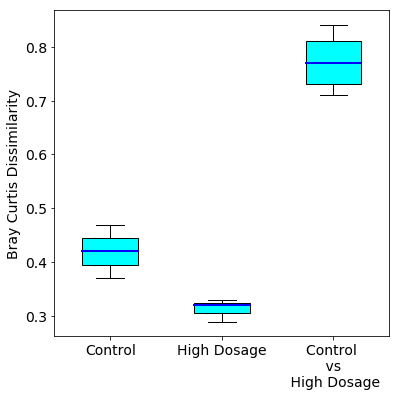

In [26]:
# Making box plots for the Bray Curtis Dissimilarities

plt.rcParams.update({"figure.figsize":(6, 6)})

controls_bc = np.array([.42,.37,.47])
highdose_bc = np.array([.33,.29,.32])
mixed_bc = np.array([.81,.73,.77,.71,.71,.75,.80,.84,.83])
data = [controls_bc, highdose_bc, mixed_bc]

labels = ['Control', 'High Dosage', 'Control \n vs \n High Dosage']
medianline = dict(linestyle='-', linewidth=2, color='b')
bp = plt.boxplot(data, labels=labels, medianprops=medianline, widths=.5, patch_artist=True, 
                 boxprops=dict(facecolor="cyan"))
plt.ylabel('Bray Curtis Dissimilarity', fontsize=14)

In [29]:
# One way ANOVA comparing bray curtis dissimilarities

F1, p1 = stats.f_oneway(controls_bc, mixed_bc)
F2, p2 = stats.f_oneway(highdose_bc, mixed_bc)
F3, p3 = stats.f_oneway(highdose_bc, controls_bc)
print(p1)
print(p2)
print(p3)

9.847925773651743e-07
3.46791873525218e-08
0.026997302257346405


Stress = 0.1085106792673435


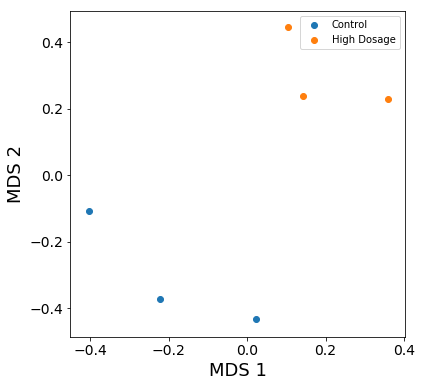

In [5]:
# MDS on data
from sklearn.manifold import MDS
bc = np.array([[0, .42, .37, .75, .77, .83], [.42, 0, .47, .71, .73, .84], [.37, .47, 0, .71, .81, .80], 
               [.75, .71, .71, 0, .33, .29], [.77, .73, .81, .33, 0, .32], [.83, .84, .8, .29, .32, 0]])
embedding = MDS(n_components=2, dissimilarity='precomputed')
transformed = embedding.fit_transform(bc)
stress = embedding.stress_
plt.scatter(transformed[:3,0], transformed[:3,1], label="Control")
plt.scatter(transformed[3:,0], transformed[3:,1], label="High Dosage")
plt.legend()
plt.xlabel("MDS 1", fontsize=18)
plt.ylabel("MDS 2", fontsize=18)
print("Stress = " + str(stress))

Stress = 0.024439072776630277


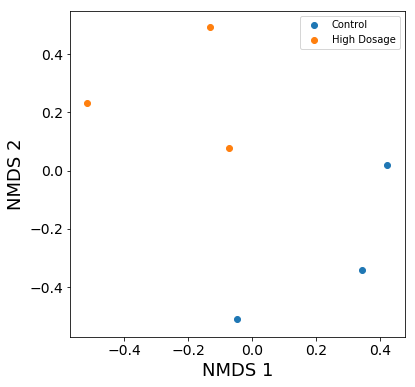

In [6]:
# NMDS on data
bc = np.array([[0, .42, .37, .75, .77, .83], [.42, 0, .47, .71, .73, .84], [.37, .47, 0, .71, .81, .80], 
               [.75, .71, .71, 0, .33, .29], [.77, .73, .81, .33, 0, .32], [.83, .84, .8, .29, .32, 0]])
embedding = MDS(n_components=2, dissimilarity='precomputed', metric=False)
transformed = embedding.fit_transform(bc)
stress = embedding.stress_
plt.scatter(transformed[:3,0], transformed[:3,1], label="Control")
plt.scatter(transformed[3:,0], transformed[3:,1], label="High Dosage")
plt.legend()
plt.xlabel("NMDS 1", fontsize=18)
plt.ylabel("NMDS 2", fontsize=18)
print("Stress = " + str(stress))

In [76]:
genera_z

{'Escherichia': '13.1806202925',
 'Lactobacillus': '1.24493034357',
 'Proteus': '11.6645335916',
 'Clostridium': '7.97287247382',
 'Ruminococcus': '1.00712129991',
 'Shigella': '7.2576077275',
 'Morganella': '23.9005115056',
 'Ihubacter': '2.26972517922',
 'Parabacteroides': '2.04813038854',
 'Enterococcus': '1.63012694679',
 'Bacteroides': '1.59007774194'}